Ever since I've been interested in Data Science , I've thought of the differences in this field in India and USA. There have been certain norms regarding the differences that have been set during the years, what remains to be seen is whether the survey complies with those norms or contradicts them. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
print(os.listdir("../input"))
pd.set_option('display.max_columns', None)

['SurveySchema.csv', 'freeFormResponses.csv', 'multipleChoiceResponses.csv']


In [2]:
df=pd.read_csv('../input/multipleChoiceResponses.csv')
df=df.drop(df.index[0])

In [3]:
c= pd.value_counts(df.Q3)
d = pd.DataFrame(data=c)
d.columns=['count']
d=d.iloc[:9,:].sort_values('count',ascending=True)
d['count'] = pd.to_numeric(d['count'], errors='coerce')

data=[go.Bar(
            x=d["count"],
            y=d.index,
             marker=dict(
             color=['#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#142270','#8e7bbb'],
             line=dict(
            color=['#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#8e7bbb','#142270','#8e7bbb'],
            width=1),
                        ),
            orientation='h' )]
layout = go.Layout(
    height=500,
    autosize=True,
    title=' Countrywise contribution in the survey',
    hovermode='closest',
    xaxis=dict(title='', ticklen=5, zeroline=False, gridwidth=2, domain=[0.2, 1]),
    yaxis=dict(title='', ticklen=5, gridwidth=10),
    
)

fig = go.Figure(data=data,layout=layout)
py.offline.iplot(fig, filename='horizontal-bar')


As it appears, India has the second highest reponse after America.

Now Let's compare the preferences of Indians and Americans . 

In [4]:
df['Q3']=df['Q3'].replace(['United States of America'], 'USA')
india=df[df.Q3=="India"]
usa=df[df.Q3=="USA"]
india = india[~pd.isnull(india['Q35_Part_1'])]
count_dict = {
    'Self-taught' : (india['Q35_Part_1'].astype(float)>0).sum(),
    'Online courses (Coursera, Udemy, edX, etc.)' : (india['Q35_Part_2'].astype(float)>0).sum(),
    'Work' : (india['Q35_Part_3'].astype(float)>0).sum(),
    'University' : (india['Q35_Part_4'].astype(float)>0).sum(),
    'Kaggle competitions' : (india['Q35_Part_5'].astype(float)>0).sum(),
    'Other' : (india['Q35_Part_6'].astype(float)>0).sum()
}

cnt1 = pd.Series(count_dict)
cnt1=pd.DataFrame(data=cnt1)
cnt1.columns=['count']

usa = usa[~pd.isnull(usa['Q35_Part_1'])]
count_dict2 = {
    'Self-taught' : (usa['Q35_Part_1'].astype(float)>0).sum(),
    'Online courses (Coursera, Udemy, edX, etc.)' : (usa['Q35_Part_2'].astype(float)>0).sum(),
    'Work' : (usa['Q35_Part_3'].astype(float)>0).sum(),
    'University' : (usa['Q35_Part_4'].astype(float)>0).sum(),
    'Kaggle competitions' : (usa['Q35_Part_5'].astype(float)>0).sum(),
    'Other' : (usa['Q35_Part_6'].astype(float)>0).sum()
}

cnt2 = pd.Series(count_dict2)
cnt2=pd.DataFrame(data=cnt2)
cnt2.columns=['count']

In [5]:
trace1 = go.Bar(
    x=cnt1.index,
    y=cnt1['count'],
    name='India',
    marker=dict(
        color='#84de6a'
    )
)
trace2 = go.Bar(
    x=cnt2.index,
    y=cnt2['count'],
    name='USA',
    marker=dict(
        color='#142270'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='ML/DS education preference in India and USA ',
    xaxis=dict(
        title='',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='number of respondents',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

* Going to universities is more popular in USA than India apparently due to the much higher number of Data Science courses offered in American universities. Only a few universities in India offer Data Science courses
* Quite Strikingly, more Indians consider Kaggle Competitions as a way of learning than Americans
* More Americans learn at work than Indians (due to greater number of data science jobs in America than India)
* The "Self-Taught" and "Online Course" pattern could be considered the same beacuse more respondents are Americans.

In [6]:
c= pd.value_counts(india.Q37)
d = pd.DataFrame(data=c)
d.columns=['count']
d['count'] = pd.to_numeric(d['count'], errors='coerce')
e= pd.value_counts(usa.Q37)
f = pd.DataFrame(data=e)
f.columns=['count']
f['count'] = pd.to_numeric(f['count'], errors='coerce')
trace1 = go.Bar(
    y=d.index,
    x=d['count'],
    name='India',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=f.index,
    x=f['count'],
    name='USA',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.6)',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title="MOOC preference "
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='marker-h-bar')


*  Undoubtedly **Coursera** is the most popular MOOC and is almost equally preferred among both the groups.
*  **Datacamp** is less popular in America than India.
*  **Udemy** and **Kaggle Learn ** are preferred  by Indians more . 

##                                   **Independent Projects or Academic Achievements**

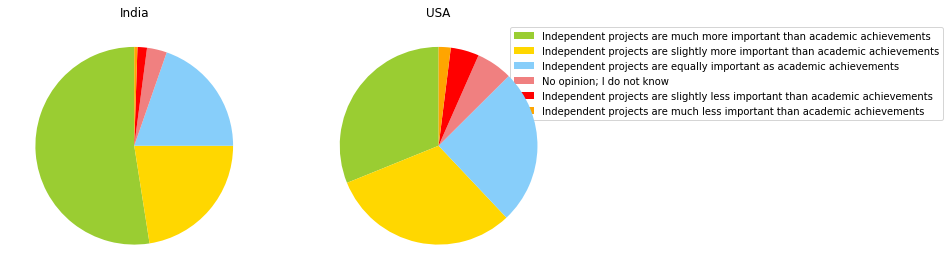

In [7]:
india=df[df.Q3=="India"]
usa=df[df.Q3=="USA"]
c= pd.value_counts(india.Q40)
d = pd.DataFrame(data=c)
d.columns=['count']
d['count'] = pd.to_numeric(d['count'], errors='coerce')
e= pd.value_counts(usa.Q40)
f = pd.DataFrame(data=e)
f.columns=['count']
f['count'] = pd.to_numeric(f['count'], errors='coerce')

g=(d['count']/1613)*100
h=(f['count']/2648)*100

from matplotlib.gridspec import GridSpec

labels1=d.index
fracs1= g.values
labels2=f.index
fracs2=h.values
the_grid = GridSpec(2, 2)
plt.figure(figsize=(10,10))
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("India")
#plt.pie(fracs1, labels=labels1, autopct='%1.1f%%', shadow=False)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','orange']
patches, texts = plt.pie(fracs1, colors=colors, startangle=90)
plt.legend(patches, labels1,loc='upper left',bbox_to_anchor=(2,1))

plt.subplot(the_grid[0, 1], aspect=1)
plt.title('USA')
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red',"orange"]
patches, texts = plt.pie(fracs2, colors=colors, startangle=90)
#plt.legend(patches, labels2)
#plt.pie(fracs2,  labels=labels2, autopct='%.0f%%', shadow=True)
plt.show()


* More Indians beleive that "Independent projects are more important than academic acheivements".
* While more Americans belive that indpenedent projects are slightly more or equally important than academic achievements. 

## **MOOC or traditional Brick and Mortar (Online)**

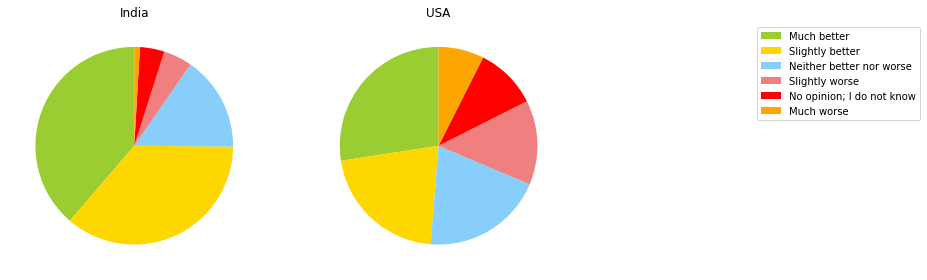

In [8]:
india=df[df.Q3=="India"]
usa=df[df.Q3=="USA"]
c= pd.value_counts(india.Q39_Part_1)
d = pd.DataFrame(data=c)
d.columns=['count']
d['count'] = pd.to_numeric(d['count'], errors='coerce')
e= pd.value_counts(usa.Q39_Part_1)
f = pd.DataFrame(data=e)
f.columns=['count']
f['count'] = pd.to_numeric(f['count'], errors='coerce')

g=(d['count']/2725)*100
h=(f['count']/3349)*100

from matplotlib.gridspec import GridSpec

labels1=d.index
fracs1= g.values
labels2=f.index
fracs2=h.values
the_grid = GridSpec(2, 2)
plt.figure(figsize=(10,10))
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("India")

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','orange']
patches, texts = plt.pie(fracs1, colors=colors, startangle=90)
plt.legend(patches, labels1,loc='upper left',bbox_to_anchor=(3,1))

plt.subplot(the_grid[0, 1], aspect=1)
plt.title('USA')
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red',"orange"]
patches, texts = plt.pie(fracs2, colors=colors, startangle=90)

plt.show()


* More Americans seem to believe that the quality of traditional brick and mortar education is better than or equal to MOOC education.
* More Indians believe that the quality of education provided by MOOCs is better than traditional brick and mortar courses(due to the less number of offline Data Science courses in India or their less exposure to it ).

In [9]:
from plotly import tools
def get_trace(country_name):
    df1=df.copy()
    df1 = df1[df1["Q3"]==country_name]  
    
    ys = [df1['Q34_Part_1'].values, 
      df1['Q34_Part_2'].values,
      df1['Q34_Part_3'].values,
       df1['Q34_Part_4'].values,
      df1['Q34_Part_5'].values,
      df1['Q34_Part_6'].values
     ]
    names=[
           "Gathering Data",
        "Cleaning Data",
        "Visualizing Data",
        "Model Building ",
        "Production",
        "Finding Insights",
        "Other"
    ]
    colors = ["#3498db", "#95a5a6", "#e74c3c", "#34495e","#df6a84","#ad2543","#223f08"]

    trace = []
    for i in range(6):
        trace.append ( 
            go.Box(
                y=ys[i],
                name=names[i],
                marker = dict(
                    color=colors[i],
                )
            )
        )
    return trace
    
traces_list = []
country_names = ['India',"USA"]
for country_name in country_names:
    traces_list.append(get_trace(country_name))

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.1, 
                          subplot_titles=country_names)
for ind, traces in enumerate(traces_list):
    for trace in traces:
        fig.append_trace(trace , int(np.floor(ind/2)+1), int((ind%2) + 1))

fig['layout'].update(height=500, width=800, paper_bgcolor='rgb(249,249,249)', title=" Time engaged in Various Tasks", showlegend=False)
iplot(fig, filename='mldscountry')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



More Indians spend time in Model Building while more Americans spent time in Finding Insights in the data and communicating to the stakeholders. This difference could be attributed to the fact that the data science community in USA is more mature as compared to the Data Science Community in India.

In [10]:
india=df[df.Q3=="India"]
usa=df[df.Q3=="USA"]
c= pd.value_counts(india.Q1)
d = pd.DataFrame(data=c)
d.columns=['count']
d['count'] = pd.to_numeric(d['count'], errors='coerce')
e= pd.value_counts(usa.Q1)
f = pd.DataFrame(data=e)
f.columns=['count']
f['count'] = pd.to_numeric(f['count'], errors='coerce')
trace1 = go.Bar(
    x=d.index,
    y=d['count'],
    name='India',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=f.index,
    y=f['count'],
    name='USA',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Gender-wise Participation in the survey',
    xaxis=dict(
        title='Gender',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
           
        )
    ),
    yaxis=dict(
        title='Number of respondents',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

There are more Male Indian participants and more Female American Participants.

Now, let's remove the respondents who have ***not disclosed their Annual Compensation*** and see if the graph remains the same . 

In [11]:
df = df[~df.Q9.isnull()].copy()
not_disclosed = df[df.Q9 == 'I do not wish to disclose my approximate yearly compensation'].index
personal_data = df.drop(list(not_disclosed), axis=0)
personal_data['Q3']=personal_data['Q3'].replace(['United States of America'], 'USA')

india=personal_data[personal_data.Q3=="India"]
usa=personal_data[personal_data.Q3=="USA"]
c= pd.value_counts(india.Q1)
d = pd.DataFrame(data=c)
d.columns=['count']
d['count'] = pd.to_numeric(d['count'], errors='coerce')
e= pd.value_counts(usa.Q1)
f = pd.DataFrame(data=e)
f.columns=['count']
f['count'] = pd.to_numeric(f['count'], errors='coerce')

trace1 = go.Bar(
    x=d.index,
    y=d['count'],
    name='India',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=f.index,
    y=f['count'],
    name='USA',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Gender-wise Participation diferrence in India and USA',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

Whoa! ***A lot of Indian Males haven't disclosed their annual compensation***. 

Now let's take a look at the compensation difference between the two countries.

In [12]:
c= pd.value_counts(india.Q9)
d = pd.DataFrame(data=c)
d.columns=['count']
d['count'] = pd.to_numeric(d['count'], errors='coerce')
e= pd.value_counts(usa.Q9)
f = pd.DataFrame(data=e)
f.columns=['count']
f['count'] = pd.to_numeric(f['count'], errors='coerce')

trace1 = go.Bar(
    x=d.index,
    y=d['count'],
    name='India',
    marker=dict(
        color='#947665'
    )
)
trace2 = go.Bar(
    x=f.index,
    y=f['count'],
    name='USA',
    marker=dict(
        color='#591b0c'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Compensation difference',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average Yearly Compensation',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')


* Most of the Indians are paid in the salary range 0-10, 000 while most of the Americans are paid in the range 100-125,000.
*  The salary curve for Indians decreases exponentially as the salary range increases. 

Now we will calculate the Average Yearly Compensation and visualize the gender pay gap in both the countries.

In [13]:
from pandas.api.types import CategoricalDtype

# transforming compensation into category type and ordening the values
categ = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000',
         '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000',
         '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000',
         '300-400,000', '400-500,000', '500,000+']
cat_type = CategoricalDtype(categories=categ, ordered=True)
personal_data.Q9 = personal_data.Q9.astype(cat_type)

categ = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', 
         '45-49', '50-54', '55-59', '60-69', '70-79', '80+']
cat_type = CategoricalDtype(categories=categ, ordered=True)
personal_data.Q2 = personal_data.Q2.astype(cat_type)

# transforming years of experience into category type and ordening the values
categ = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10',
         '10-15', '15-20', '20-25', '25-30', '30+']
cat_type = CategoricalDtype(categories=categ, ordered=True)
personal_data.Q8 = personal_data.Q8.astype(cat_type)

# transforming education level into category type and ordening the values
categ = ['No formal education past high school', 'Some college/university study without earning a bachelor’s degree',
         'Professional degree', 'Bachelor’s degree', 'Master’s degree', 'Doctoral degree', 'I prefer not to answer']
cat_type = CategoricalDtype(categories=categ, ordered=True)
personal_data.Q4 = personal_data.Q4.astype(cat_type)

In [14]:
compensation = personal_data.Q9.str.replace(',', '').str.replace('500000\+', '500-500000').str.split('-')
personal_data['yearly_compensation_numerical'] = compensation.apply(lambda x: (int(x[0]) * 1000 + int(x[1]))/ 2)/1000 # it is calculated in thousand dollars
india=personal_data[personal_data.Q3=="India"]
usa=personal_data[personal_data.Q3=="USA"]
i=india.groupby(['Q1'], as_index=False)['yearly_compensation_numerical'].mean()
u=usa.groupby(['Q1'], as_index=False)['yearly_compensation_numerical'].mean()
i=i.iloc[0:2,:]
u=u.iloc[0:2,:]
trace1 = go.Bar(
    x=i['Q1'],
    y=i['yearly_compensation_numerical'],
    name='India',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=u['Q1'],
    y=u['yearly_compensation_numerical'],
    name='USA',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Gender pay gap in India and USA',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average Yearly Compensation',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
     legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

* American males are paid more than American females.
* The graph shows that Indian Females are paid more than India Males which may be due to the fact that a lot of Indian males haven't disclosed their salaries.

Let's see the Average Salary differences in both the countries for the same experience level.

In [15]:
i2=india.groupby(['Q8'], as_index=False)['yearly_compensation_numerical'].mean()
u2=usa.groupby(['Q8'], as_index=False)['yearly_compensation_numerical'].mean()
trace1 = go.Bar(
    x=i2['Q8'],
    y=i2['yearly_compensation_numerical'],
    name='India',
    marker=dict(
        color='#b02520'
    )
)
trace2 = go.Bar(
    x=u2['Q8'],
    y=u2['yearly_compensation_numerical'],
    name='USA',
    marker=dict(
        color='#281b72'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Compensation Difference for the Same Experience level',
    xaxis=dict(
        title='Experience level in Years',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average Yearly Compensation',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

* As we can see there is a huge compensation difference in both the countries for the same experience level.
* What is unsettling is **for India , how can the average salary decrease as the experience level increases** , like in the range 3-4 years and 15-20 years.

The huge compensation difference for both the countries could be attributed to the fact of difference in cost of living in both the countries. So let's remove that factor by normalizing the salary and then plotting.

In [16]:
# price index for India and USA is 78 and 178 respectively.
india['normalized_compensation'] = india.yearly_compensation_numerical / 78 * 10
india['normalized_compensation'] = india['normalized_compensation'].round() * 10
usa['normalized_compensation'] = usa.yearly_compensation_numerical / 178 * 10
usa['normalized_compensation'] = usa['normalized_compensation'].round() * 10
i2=india.groupby(['Q8'], as_index=False)['normalized_compensation'].mean()
u2=usa.groupby(['Q8'], as_index=False)['normalized_compensation'].mean()
trace1 = go.Bar(
    x=i2['Q8'],
    y=i2['normalized_compensation'],
    name='India',
    marker=dict(
        color='#b02520'
    )
)
trace2 = go.Bar(
    x=u2['Q8'],
    y=u2['normalized_compensation'],
    name='USA',
    marker=dict(
        color='#281b72'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Average Normalized Salary as per Experience level',
    xaxis=dict(
        title='Experience level in Years',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average Normalized Yearly Compensation',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')


The difference in compensation reduces but it still remains.

In [17]:
i3=india.groupby(['Q6'], as_index=False)['yearly_compensation_numerical'].mean()
u3=usa.groupby(['Q6'], as_index=False)['yearly_compensation_numerical'].mean()
i3=i3.iloc[:10,:]
u3=u3.iloc[:10,:]
trace1 = go.Bar(
    x=i3['Q6'],
    y=i3['yearly_compensation_numerical'],
    name='India',
    marker=dict(
        color='#131d43'
    )
)
trace2 = go.Bar(
    x=u3['Q6'],
    y=u3['yearly_compensation_numerical'],
    name='USA',
    marker=dict(
        color='#c073e7'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Average Salaray as per the job title ',
    xaxis=dict(
        title='Role',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average Yearly Compensation',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

* Another astonishing revealation - Data Journalist jobs pay the most in India , even more than the Chief Officer post in US

In [18]:
i3=india.groupby(['Q2'], as_index=False)['yearly_compensation_numerical'].mean()
u3=usa.groupby(['Q2'], as_index=False)['yearly_compensation_numerical'].mean()
i3=i3.iloc[:10,:]
u3=u3.iloc[:10,:]
trace1 = go.Bar(
    x=i3['Q2'],
    y=i3['yearly_compensation_numerical'],
    name='India',
    marker=dict(
        color='#224324'
    )
)
trace2 = go.Bar(
    x=u3['Q2'],
    y=u3['yearly_compensation_numerical'],
    name='USA',
    marker=dict(
        color='#cfceed'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Average Salaray as per the age group ',
    xaxis=dict(
        title='Age group',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average Yearly Compensation',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

* In India the highest paying age group is 55-59 while in America it is  45-49 (over a decade's difference )
* The salary for Americans increase with increase in age group while it's not the same for Indians ,40-44 age group sees a decrease in average yearly compensation and for the 60-69 age group too.

In [19]:
i3=india.groupby(['Q24'], as_index=False)['yearly_compensation_numerical'].mean()
u3=usa.groupby(['Q24'], as_index=False)['yearly_compensation_numerical'].mean()
i3=i3.iloc[:9,:]
u3=u3.iloc[:9,:]
trace1 = go.Bar(
    x=i3['Q24'],
    y=i3['yearly_compensation_numerical'],
    name='India',
    marker=dict(
        color='#224324'
    )
)
trace2 = go.Bar(
    x=u3['Q24'],
    y=u3['yearly_compensation_numerical'],
    name='USA',
    marker=dict(
        color='#cfceed'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Average Salary as per the years spent writing codes to analyze data ',
    xaxis=dict(
        title='',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Average Yearly Compensation',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
         x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='style-bar')

People with 40+ years of experience in writing code are paid the most in both the countries(as expected )

# Conclusion
To sum up we can say that Data Science is a mature field in USA while it's still in the developing phase in India.
Most of the above differences can be explained by this fact. 